# 26: LIBRERÍAS PARA REGRESIÓN LOGÍSTICA

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Cargamos un dataframe 

data = pd.read_csv('../../Recursos_curso/datasets/bank/bank.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Analisis preliminar

In [3]:
 # Obtener un resuemn de los datos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [4]:
# Obtener un resumen estadístico de los datos

data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Arreglar los datos de la columna 'education'. Basicamente los ponemos bonitos y entendibles

data["education"] = np.where(data["education"] == "basic.4y", "Basic", data["education"]) # 1er argumento = valor buscado
data["education"] = np.where(data["education"] == "basic.6y", "Basic", data["education"]) # 2o argumento = nuevo valor
data["education"] = np.where(data["education"] == "basic.9y", "Basic", data["education"]) # 3er argumento = valor en caso de valor no buscado

data["education"] = np.where(data["education"] == "high.school", "High School", data["education"])
data["education"] = np.where(data["education"] == "professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"] == "university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"] == "illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"] == "unknown", "Unknown", data["education"])

In [6]:
# Comprobar el resultado de las observaciones 'Y'

data['y'].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

In [28]:
# Agrupar los datos en función de la onservación 'Y' àra ver si hay alguna relación aparente. Solo se puede en oarametros de tipo numérico

parametros = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

y_grouped = data.groupby('y')[parametros]
y_grouped.mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
yes,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


### Plots para viasualizar los datos

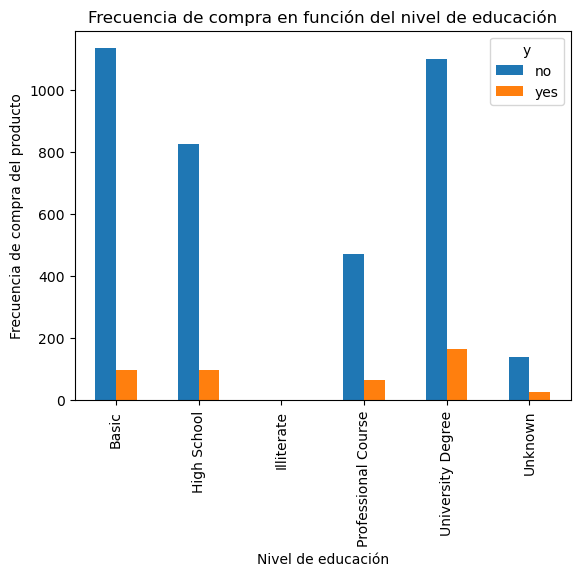

In [30]:
# Observación 'y' en función de la educación del individuo

pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")
%matplotlib inline

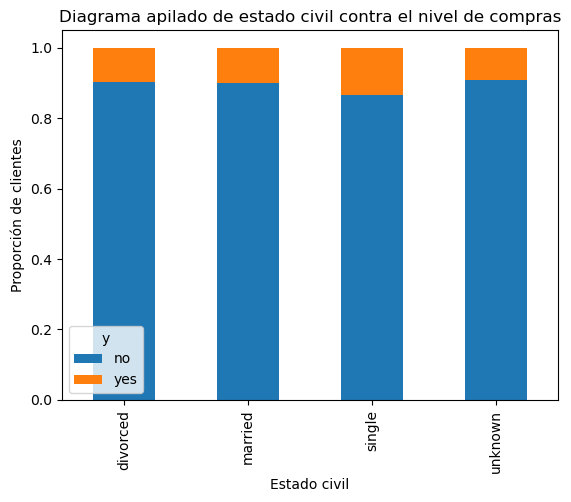

In [32]:
# Diagrama apilado de la observación 'y' en función del estado civil

table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")
%matplotlib inline

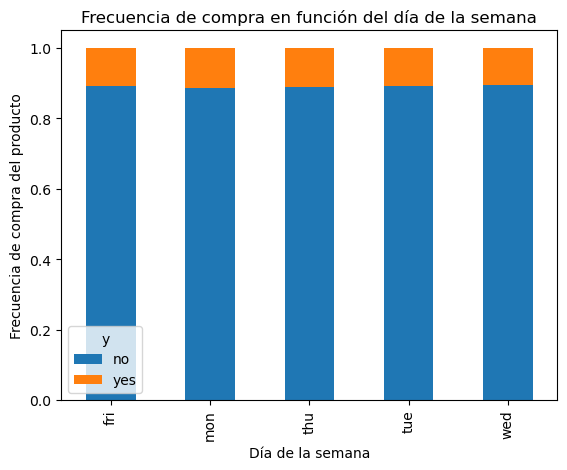

In [33]:
# Diagrama apilado de la observación 'y' en función del día de la semana

table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")
%matplotlib inline

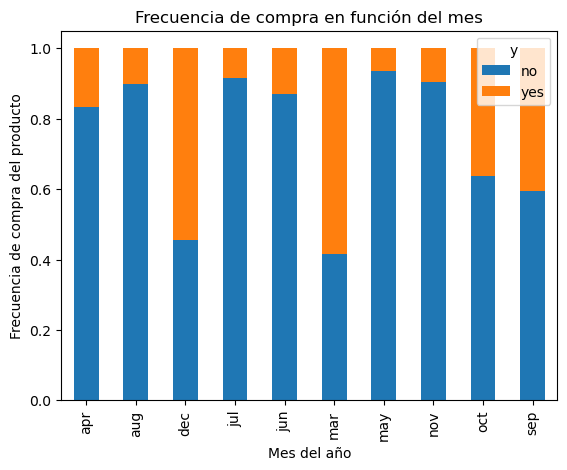

In [34]:
# Diagrama apilado de la observación 'y' en función del mes

table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")
%matplotlib inline

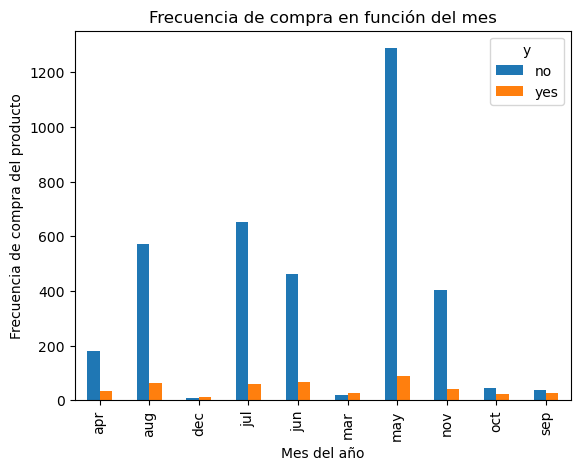

In [36]:
# Observación 'y' en función del mes

table.plot(kind = "bar", stacked = False)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")
%matplotlib inline

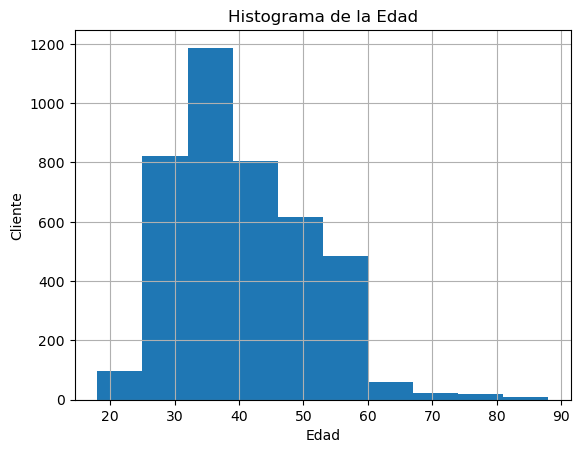

In [37]:
# Histograma de la edad de los clientes

data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")
%matplotlib inline

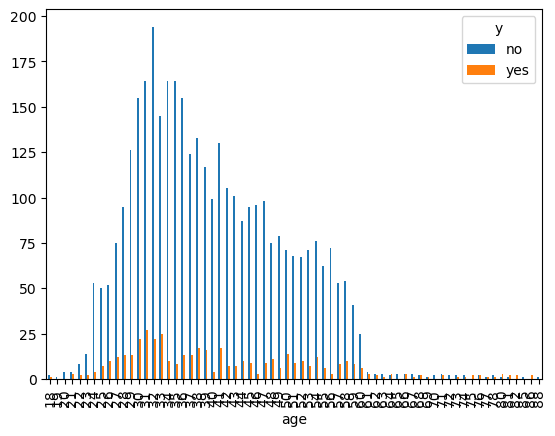

In [38]:
# Histograma de la edad del cliente respecto a la observación 'y'

pd.crosstab(data.age, data.y).plot(kind = "bar")
%matplotlib inline

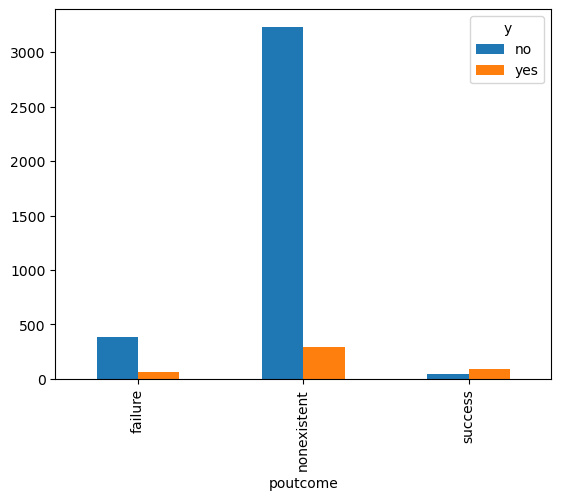

In [39]:
# Histograma del fracaso o exito en las inversiones previas respecto a la observación 'y'

pd.crosstab(data.poutcome, data.y).plot(kind = "bar")
%matplotlib inline

### Conversión de variables categóricas en dummies

In [40]:
# Crear las nuevas variables dummies

variables_categoricas = ["job", "marital", "education", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

clean_data = data

for i in variables_categoricas:
    new_name = 'new_' + i
    new_dummy = pd.get_dummies(data[i], prefix = new_name)
    new_data = clean_data.join(new_dummy)
    clean_data = new_data

In [44]:
# Comporbar que hemos creado las variables dummies correctamente

new_categories = clean_data.columns.values.tolist()
print(f'Antes teniamos {len(data.columns.values.tolist())} parametros y ahora tenemos {len(new_categories)}')

Antes teniamos 21 parametros y ahora tenemos 69


In [47]:
# Eliminar las varaibles categoricas del nuevo dataframe

variables_no_categoricas = [i for i in new_categories if i not in variables_categoricas] 
variables_no_categoricas.remove('default') # quitamos el parametro 'default' que no sabemos que es

In [48]:
variables_no_categoricas

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'new_job_admin.',
 'new_job_blue-collar',
 'new_job_entrepreneur',
 'new_job_housemaid',
 'new_job_management',
 'new_job_retired',
 'new_job_self-employed',
 'new_job_services',
 'new_job_student',
 'new_job_technician',
 'new_job_unemployed',
 'new_job_unknown',
 'new_marital_divorced',
 'new_marital_married',
 'new_marital_single',
 'new_marital_unknown',
 'new_education_Basic',
 'new_education_High School',
 'new_education_Illiterate',
 'new_education_Professional Course',
 'new_education_University Degree',
 'new_education_Unknown',
 'new_housing_no',
 'new_housing_unknown',
 'new_housing_yes',
 'new_loan_no',
 'new_loan_unknown',
 'new_loan_yes',
 'new_contact_cellular',
 'new_contact_telephone',
 'new_month_apr',
 'new_month_aug',
 'new_month_dec',
 'new_month_jul',
 'new_month_jun',
 'new_month_mar',
 'new_month_may',
 'new_month_no

In [117]:
# Crear el nuevo dataframe sin las variables categóricas

new_dataframe = clean_data[variables_no_categoricas]
new_dataframe.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,new_month_oct,new_month_sep,new_day_of_week_fri,new_day_of_week_mon,new_day_of_week_thu,new_day_of_week_tue,new_day_of_week_wed,new_poutcome_failure,new_poutcome_nonexistent,new_poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,False,False,True,False,False,False,False,False,True,False
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,False,False,True,False,False,False,False,False,True,False
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,False,False,False,False,False,False,True,False,True,False
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,False,False,True,False,False,False,False,False,True,False
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,False,False,False,True,False,False,False,False,True,False


### Decidir que parametros vamos a utilizar

In [51]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [54]:
# Definir cuales son los parametros y cual la observación

observaciones = ['y']
parametros = new_dataframe.columns.values.tolist()
parametros.remove('y')

In [55]:
# Definir cuantos parametros queremos usar para el modelo

numero = 12

In [59]:
# Determinar que parametros son más importantes

parameters_determination = RFE(LogisticRegression(), n_features_to_select = numero).fit(new_dataframe[parametros], 
                                                                                        new_dataframe[observaciones].values.ravel())    

C:\Users\Usuario\anaconda3\envs\curso_machine_learning\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usuario\anaconda3\envs\curso_machine_learning\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [63]:
# Visualizar un vector de True o False en función de si es un parametro para seleccionar o no

decision = parameters_determination.support_
decision

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False,  True])

In [64]:
# Visualizar un vector de con el ranking de mejores parametros para ser seleccionados

ranking = parameters_determination.ranking_
ranking

array([38, 37, 17, 45,  1, 19, 24, 22,  1, 34,  2,  8,  5, 39,  7,  1,  6,
       23, 43,  1,  1, 41, 16, 27, 26, 47, 33, 14, 46, 18, 28,  4,  9, 15,
       44, 13, 20, 30, 11,  3, 36, 21,  1,  1,  1,  1,  1, 12, 40, 42, 31,
       25, 29, 35, 10,  1, 32,  1])

In [68]:
# Visualizar todo junto

resultado_decision = list(zip(parametros, decision, ranking))
resultado_decision

[('age', False, 38),
 ('duration', False, 37),
 ('campaign', False, 17),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 19),
 ('cons.price.idx', False, 24),
 ('cons.conf.idx', False, 22),
 ('euribor3m', True, 1),
 ('nr.employed', False, 34),
 ('new_job_admin.', False, 2),
 ('new_job_blue-collar', False, 8),
 ('new_job_entrepreneur', False, 5),
 ('new_job_housemaid', False, 39),
 ('new_job_management', False, 7),
 ('new_job_retired', True, 1),
 ('new_job_self-employed', False, 6),
 ('new_job_services', False, 23),
 ('new_job_student', False, 43),
 ('new_job_technician', True, 1),
 ('new_job_unemployed', True, 1),
 ('new_job_unknown', False, 41),
 ('new_marital_divorced', False, 16),
 ('new_marital_married', False, 27),
 ('new_marital_single', False, 26),
 ('new_marital_unknown', False, 47),
 ('new_education_Basic', False, 33),
 ('new_education_High School', False, 14),
 ('new_education_Illiterate', False, 46),
 ('new_education_Professional Course', False, 18),
 

In [74]:
# Quedarse con aquellos aprametros que son importantes

parametros_importantes = []
for i in range(len(resultado_decision)):
    if resultado_decision[i][1] == True:
        parametros_importantes.append(resultado_decision[i][0])

In [75]:
parametros_importantes

['previous',
 'euribor3m',
 'new_job_retired',
 'new_job_technician',
 'new_job_unemployed',
 'new_month_dec',
 'new_month_jul',
 'new_month_jun',
 'new_month_mar',
 'new_month_may',
 'new_poutcome_failure',
 'new_poutcome_success']

In [76]:
len(parametros_importantes)

12

In [118]:
# Establecer los los dataframes con los que se van a hacer la regresion logística

x_valores = new_dataframe[parametros_importantes].astype(float) # se convierten en float para cambiar los True por 1 y los False por 0
y_valores = new_dataframe['y']
for i in range(len(y_valores)):
    y_valores[i] = np.where(y_valores[i] == 'no', False, True) # primero convertimos en False los 'no' y en True los 'yes'
y_valores = y_valores.astype(float) # despues los pasamos a float nuevamente 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25660\2409959501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_valores[i] = np.where(y_valores[i] == 'no', False, True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25660\2409959501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_valores[i] = np.where(y_valores[i] == 'no', False, True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25660\2409959501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [121]:
y_valores.value_counts()

y
0.0    3668
1.0     451
Name: count, dtype: int64

### Regresión Logística con la librería STASTMODEL.API

In [78]:
import statsmodels.api as sm

In [127]:
# Realizamos el modelo logístico 

logistic_model_1 = sm.Logit(y_valores, x_valores).fit()

Optimization terminated successfully.
         Current function value: 0.279578
         Iterations 7


In [129]:
# Observamos los valores de la regresion logísitca

logistic_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             Method:            MLE        
Dependent Variable:  y                 Pseudo R-squared:  0.191      
Date:                2024-07-01 15:01  AIC:               2327.1654  
No. Observations:    4119              BIC:               2403.0458  
Df Model:            11                Log-Likelihood:    -1151.6    
Df Residuals:        4107              LL-Null:           -1422.9    
Converged:           1.0000            LLR p-value:       2.5015e-109
No. Iterations:      7.0000            Scale:             1.0000     
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous              0.3539   0.1411   2.5077 0.0122  0.0773  0.6306
euribor3m            -0.6362   0.0270 -23.5419 0.0000 -0.6892 -0.5832
new_job_retired       0.0918   0.2209   0.4155 0.6777 -0.3411  0.5247
new_job_technician    0.0772   0.1468   0.5259 0.5990 -0.2105  0.3650
new_job_unemployed    0.1661   0.3028   0.5485 0.5833 -0.4274  0.7596
new_month_dec         0.6517   0.4663   1.3976 0.1622 -0.2622  1.5655
new_month_jul         0.3280   0.1837   1.7856 0.0742 -0.0320  0.6880
new_month_jun         0.3245   0.1689   1.9219 0.0546 -0.0064  0.6555
new_month_mar         1.0185   0.3157   3.2262 0.0013  0.3997  1.6372
new_month_may        -1.0666   0.1261  -8.4575 0.0000 -1.3138 -0.8195
new_poutcome_failure -1.0788   0.2460  -4.3863 0.0000 -1.5609 -0.5968
new_poutcome_success  0.7482   0.2892   2.5870 0.0097  0.1813  1.3150
=====================================================================

"""

### Regresión Logística con la librería Scikit-learn

In [130]:
from sklearn import linear_model

In [131]:
# Realizamos el modelo logístico 

logistic_model_2 = linear_model.LogisticRegression().fit(x_valores, y_valores)

In [132]:
# Observamos los valores de la regresion logísitca

pd.DataFrame(list(zip(x_valores.columns, np.transpose(logistic_model_2.coef_))))

,0,1
0,previous,[0.394229763169444]
1,euribor3m,[-0.5064212818860228]
2,new_job_retired,[0.3456586926024284]
3,new_job_technician,[0.216012306279091]
4,new_job_unemployed,[0.3075208668327282]
5,new_month_dec,[0.8099570561148021]
6,new_month_jul,[0.368745214021405]
7,new_month_jun,[0.48876069130040695]
8,new_month_mar,[1.2109383273512349]
9,new_month_may,[-0.746827351837044]
